# Stefan-Maxwell diffusion involving three components


This example demonstrates the modeling of the multicomponent Stefan-Maxwell model involving three componentt.
First we import the Stefan-Maxwell diffusion module

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS
import matplotlib.pyplot as plt
from epcsaftpy import THdiag,component,pcsaft

The experimental data for this example was taken from Schabel 2006 (https://doi.org/10.1016/j.ces.2006.12.062)

In [2]:
texp=np.asarray([0,4.427792916,14.50035208,23.87257753,33.76909653,45.58674953,58.69408811,71.80142669,91.44521324,120.9089796,147.0930411,177.8656278,212.5493678,264.9136638,429.8518201])

wpvac=np.asarray([0.333333333,0.397028757,0.559683846,0.704648614,0.763915741,0.791401827,0.801167219,0.822653035,0.830878575,0.841458325,0.846286716,0.857199094,0.851138308,0.858388537,0.8723936549])

wtol=np.asarray([0.333333333,0.361083897,0.34858624,0.273123698,0.22781745,0.202716913,0.188759833,0.17692216,0.169121425,0.158541675,0.153713284,0.142800906,0.143816828,0.137082518,0.123003508])

wmet=np.asarray([0.333333333,0.241887346,0.091729914,0.022227687,0.008266808,0.00588126,0.010072947,0.000424805,0,0,0,0,0,0,0])

We want to describe the diffusion of water into an ASD film. The ASD-water mixture is a ternary system. First we define starting and equilibrium weight fractions.

In [3]:
nc=3
L=2E-5
wi0=np.asarray([0.333333333,0.333333333,0.333333333])
wi8=np.asarray([0.00001,0.127606346,0.872393654])
Mi=np.asarray([32.04,92.14,100000])
T=298.15
P=1E5


We define the PC-SAFT parameters

In [4]:
PVac = component('PVac', ms = 2889.9, sigma = 3.3972, eps = 204.65,
                 kappaAB = 0., eAB = 0., sites = [0, 1047, 1047], Mw = 90000)
Methanol = component('Methanol', ms = 1.5255, sigma = 3.23 , eps = 188.9, 
               kappaAB = 0.035176, eAB = 2899.5, sites = [0, 1, 1], Mw = 32.042)
Toloul = component('Toloul', ms = 2.8149, sigma = 3.7169 , eps = 285.69, 
               kappaAB = 0., eAB = 0., sites = [0, 0, 0], Mw = 92.142)
mix = Methanol + Toloul + PVac 
saft = pcsaft(mix, compute_critical = False)


For a the diffusion of three components, three binary diffusion coefficients need to be defined


$\hat{Ð} =$ 
$\left[\begin{array}{rrr} 
0 & Ð_{12} & Ð_{13} \\ 
0 & 0 & Ð_{23} \\ 
0 & 0 & 0 \\ 
\end{array}\right]$

$Ð_{vec} = \left[\begin{array}{rrr} Ð_{12} & Ð_{13} & Ð_{23} \end{array}\right]$

In [5]:
Dvec=np.asarray([1E-8,2.3E-11,1.7E-11])

Next we define the time array and which component is mobile

In [6]:
nt=300
t=np.linspace(0,texp[-1],nt)
volatile=np.asarray([True,True,False])

In [7]:
wt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,volatile)

------------- Diffusion modeling took 0.6035829 seconds ----------------


[[-1.38924984e+02  4.82202581e+02 -4.29208916e+02]
 [-1.48930202e+02  4.48956286e+02 -4.02550951e+02]
 [-1.46915484e+02  4.01870974e+02 -3.47621264e+02]
 [-1.41126839e+02  3.50615814e+02 -2.79132688e+02]
 [-1.32351869e+02  2.99352888e+02 -2.02993927e+02]
 [-1.21419306e+02  2.51194001e+02 -1.23568408e+02]
 [-1.09140549e+02  2.07965829e+02 -4.41586939e+01]
 [-9.62663036e+01  1.70477204e+02  3.27592536e+01]
 [-8.34430621e+01  1.38800483e+02  1.05435716e+02]
 [-7.11806974e+01  1.12537982e+02  1.72758286e+02]
 [-5.98404318e+01  9.10474733e+01  2.34145829e+02]
 [-4.96421333e+01  7.36071119e+01  2.89432394e+02]
 [-4.06849288e+01  5.95186043e+01  3.38754052e+02]
 [-3.29742125e+01  4.81602532e+01  3.82448802e+02]
 [-2.64493709e+01  3.90057393e+01  4.20974812e+02]
 [-2.10085445e+01  3.16229748e+01  4.54847993e+02]
 [-1.65285925e+01  2.56634219e+01  4.84597361e+02]
 [-1.28798311e+01  2.08483118e+01  5.10735334e+02]
 [-9.93611926e+00  1.69553674e+01  5.33738957e+02]
 [-7.58077195e+00  1.38069208e+

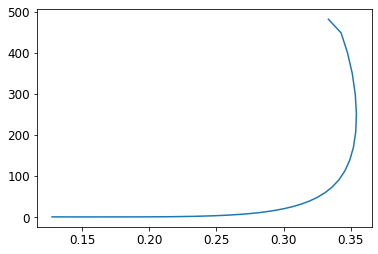

In [12]:
THii=[]
for i in range(nt):
    wit=wt[i,:]
    xit=wit/saft.Mw/(wit/saft.Mw).sum()
    THii.append(THdiag(xit,T,P,saft)/(1-wit)*(1-xit))
THii=np.asarray(THii)
print(THii)
plt.plot(wt[:,1],THii[:,1])

We plot the results

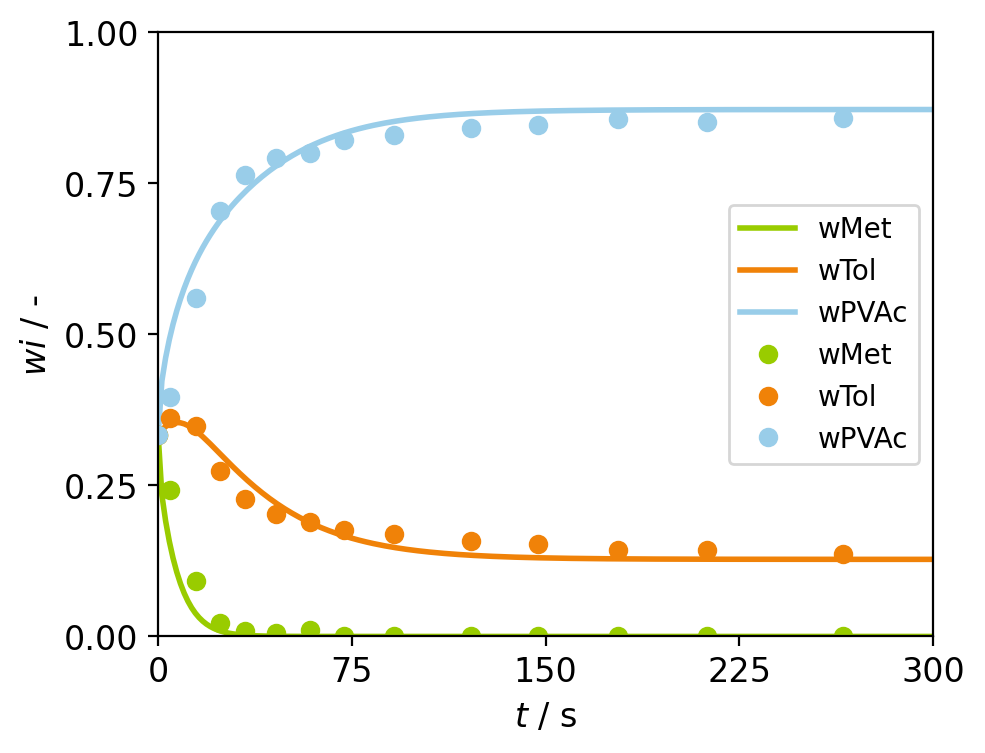

In [9]:

font = {'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

color1 = "#99CC00"
color2 = "#F08208"
color3 = "#99CDE9"

fig, ax = plt.subplots(figsize=(5, 4), dpi = 200)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax.plot(t,wt[:,0], "-",color = color1 , 
        linewidth = 2.0, label = "wMet")
ax.plot(t,wt[:,1], "-",color = color2 , 
        linewidth = 2.0, label = "wTol")
ax.plot(t,wt[:,2], "-",color = color3 , 
        linewidth = 2.0, label = "wPVAc")

ax.plot(texp,wmet, "o",color = color1 , 
        linewidth = 2.0, label = "wMet")
ax.plot(texp,wtol, "o",color = color2 , 
        linewidth = 2.0, label = "wTol")
ax.plot(texp,wpvac, "o",color = color3 , 
        linewidth = 2.0, label = "wPVAc")


ax.legend(fontsize="small")
ax.set_xlabel('$t$ / s')
ax.set_ylabel('$wi$ / -')
ax.axis([0, 300., 0., 1.])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 5))
plt.show()